# Análisis Exploratorio de Datos

## Cargo los datos

In [1]:
import pandas as pd

df = pd.read_csv("expectativa_de_vida.csv")

In [2]:
df

,Unnamed: 0,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status
0,0,Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,...,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,Developing
1,1,Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,...,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,Developing
2,2,Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,...,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,Developing
3,3,Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,...,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,Developing
4,4,Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,...,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,188,Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,...,4.998667,68.5000,0.10000,NaN,NaN,1.65000,1.56250,0.726812,12.78750,Developing
179,189,Viet Nam,74.77500,126.5625,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,...,5.977333,91.7500,0.14375,NaN,NaN,14.92500,15.62500,0.627063,11.51250,Developing
180,190,Yemen,63.86250,211.8125,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,...,5.005333,72.6250,0.10000,NaN,NaN,13.83125,13.75000,0.475500,8.50625,Developing
181,191,Zambia,53.90625,354.3125,33.4375,2.239333,89.650407,69.818182,6563.8125,17.45000,...,5.824000,74.2500,11.93125,811.811841,6.260246e+06,6.88125,6.76250,0.498437,11.21250,Developing


## Uso la función info para tener una mejor idea de lo que es este dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       183 non-null    int64  
 1   Country                          183 non-null    object 
 2   Life expectancy                  183 non-null    float64
 3   Adult Mortality                  183 non-null    float64
 4   infant deaths                    183 non-null    float64
 5   Alcohol                          182 non-null    float64
 6   percentage expenditure           183 non-null    float64
 7   Hepatitis B                      174 non-null    float64
 8   Measles                          183 non-null    float64
 9   BMI                              181 non-null    float64
 10  under-five deaths                183 non-null    float64
 11  Polio                            183 non-null    float64
 12  Total expenditure     

### Hay 20 columnas. A muchos países les faltan datos. El único feature que no es de tipo float es Status.

In [4]:
df["Status"]

0      Developing
1      Developing
2      Developing
3      Developing
4      Developing
          ...    
178    Developing
179    Developing
180    Developing
181    Developing
182    Developing
Name: Status, Length: 183, dtype: object

In [5]:
df.groupby("Status").count()["Country"]

Status
Developed      32
Developing    151
Name: Country, dtype: int64

### Hay un desbalance importante entre los dos grupos de países. Voy a ver cómo son los boxplots e histogramas de la expectativa de vida juntando primero todos los países y separando después a estos dos grupos.

<AxesSubplot:xlabel='Life expectancy', ylabel='Count'>

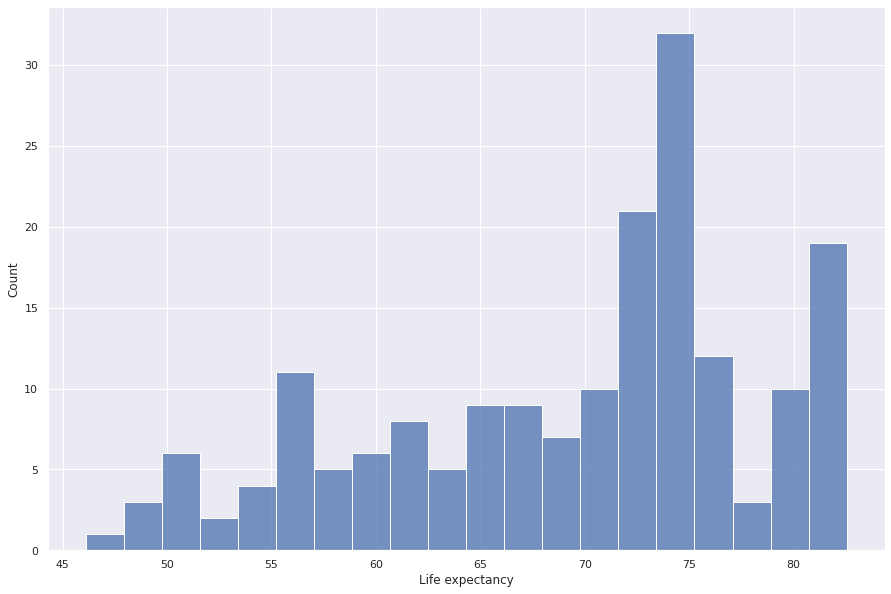

In [6]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15,10)})
sns.histplot(df["Life expectancy"], bins=20)

## Le voy a poner más bins

<AxesSubplot:xlabel='Life expectancy', ylabel='Count'>

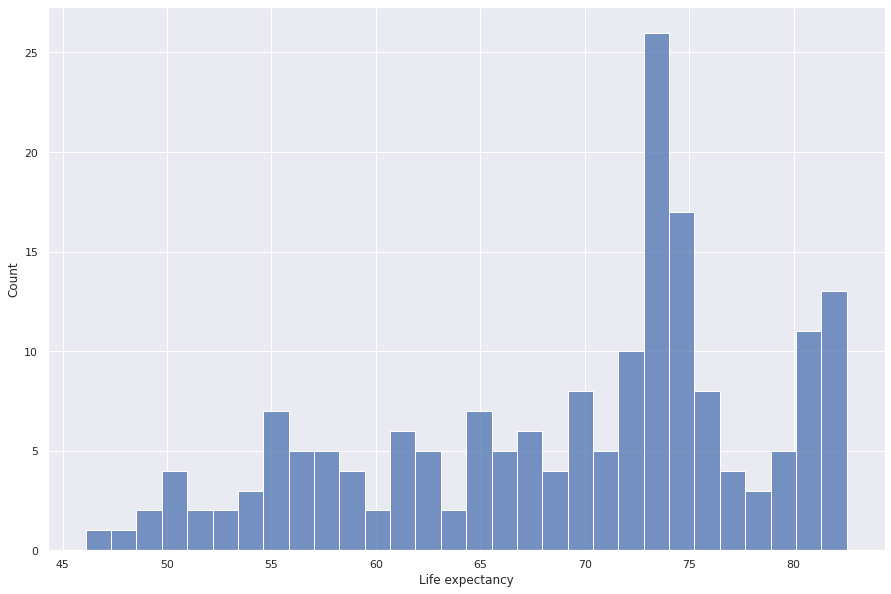

In [7]:
sns.histplot(df["Life expectancy"], bins=30)

<AxesSubplot:xlabel='Life expectancy', ylabel='Count'>

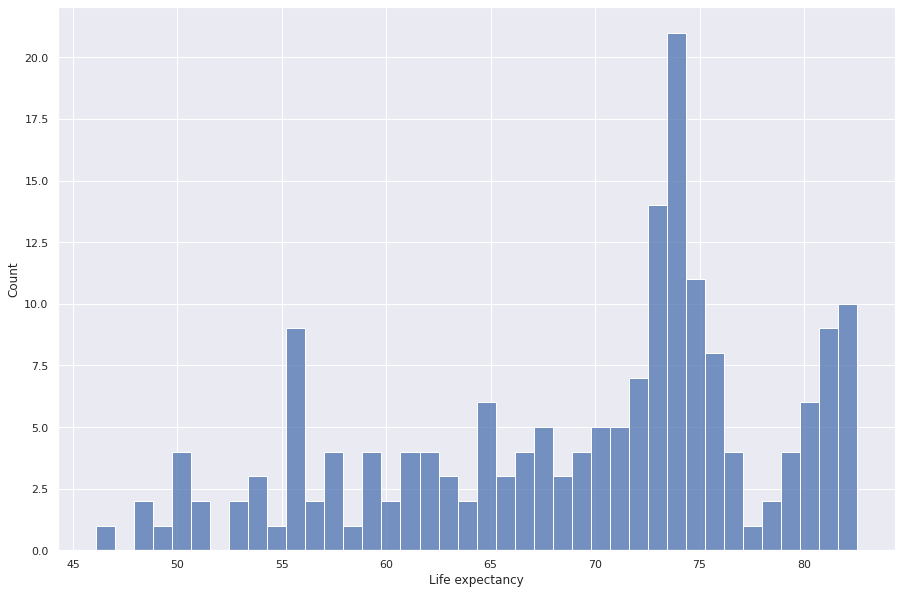

In [8]:
sns.histplot(df["Life expectancy"], bins=40)

### Hay claramente 3 grupos de países. De 70 años para abajo, hay un grupo con distribución uniforme. Alrededor de los 74 años hay un segundo grupo con distribución aproximadamente normal y de 77 para arriba hay un tercer grupo con una distribución que parece ser la mitad izquierda de una normal.

## Voy a poner más barras para apreciar mejor la distribución del tercer grupo

<AxesSubplot:xlabel='Life expectancy', ylabel='Count'>

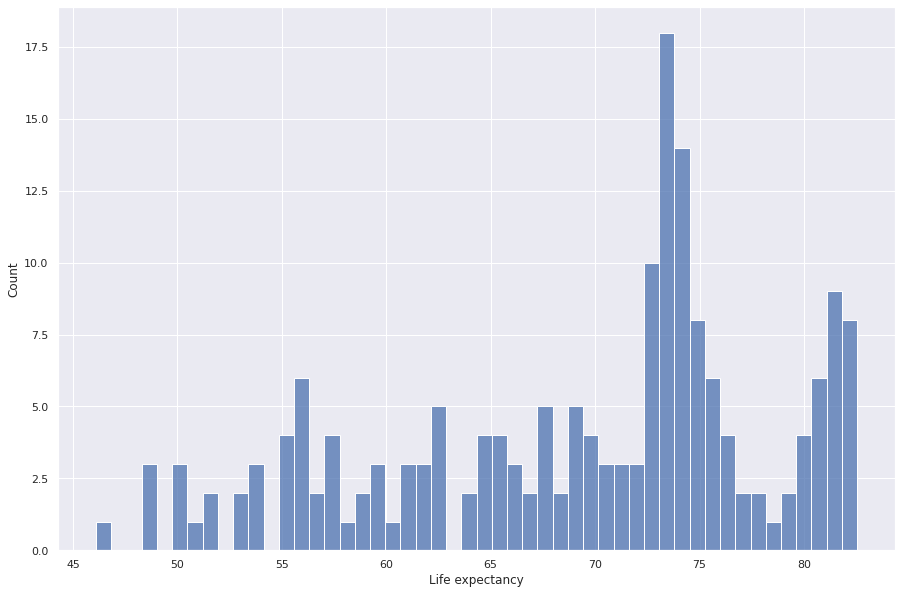

In [9]:
sns.histplot(df["Life expectancy"], bins=50)

<AxesSubplot:xlabel='Life expectancy', ylabel='Count'>

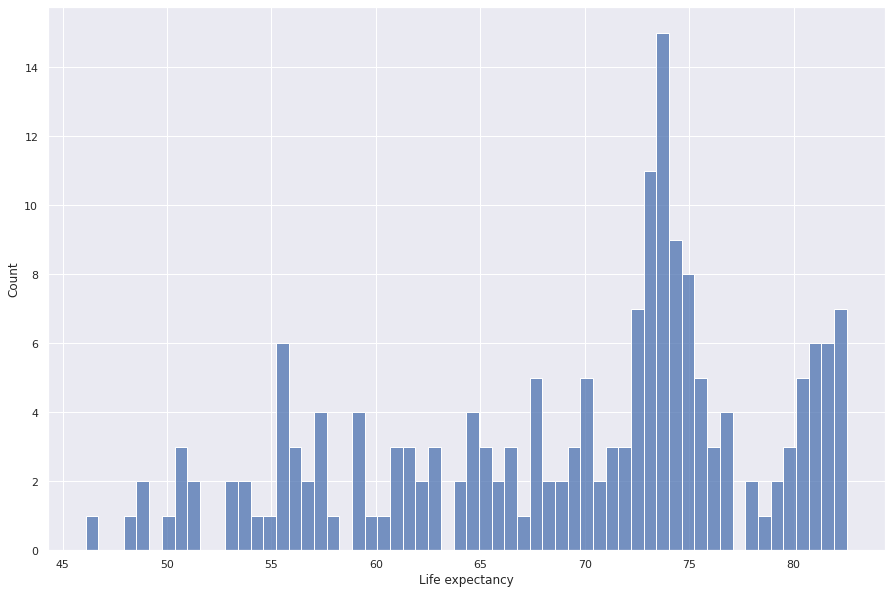

In [10]:
sns.histplot(df["Life expectancy"], bins=60)

### Es llamativo que el segundo pico más alto esté en el extremo derecho. Pensé que vería un decrecimiento gradual al aumentar la cantidad de años.

## Hago un boxplot de la expectativa de vida

/home/andres/anaconda3/envs/tp3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Life expectancy'>

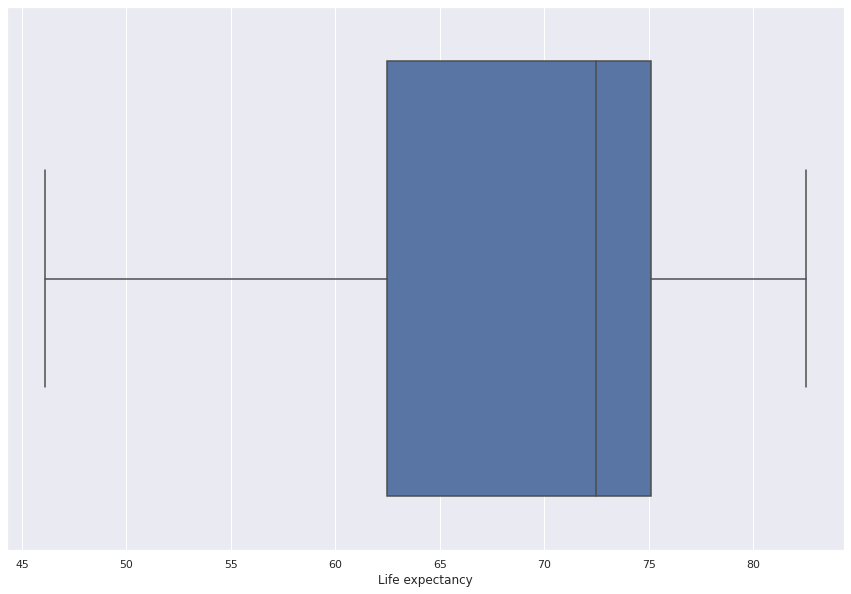

In [11]:
sns.boxplot(df["Life expectancy"])

### Esto no es útil porque no muestra las diferencias entre los grupos de países. Voy a hacer un boxplot para cada grupo de países según la clasificación de la columna Status.

/home/andres/anaconda3/envs/tp3/lib/python3.6/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


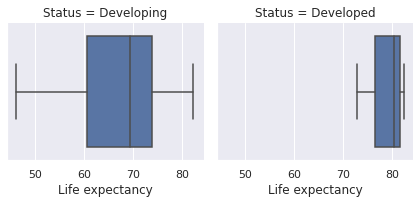

In [12]:
sns.FacetGrid(df, col="Status").map(sns.boxplot, "Life expectancy")

### La diferencia es bastante grande; más de 10 años en la mediana entre los dos grupos. También llama la atención que en la categoría Developing (países "en vías de desarrollo") hay una dispersión muy grande, con algunos países que tienen expectativas superiores a los 80 años. Voy a ver cuáles son estos últimos.

In [13]:
df[(df["Life expectancy"] > 80) & (df["Status"] == "Developing")]

,Unnamed: 0,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status
30,30,Canada,81.68750,64.6250,2.0000,8.053333,4694.078971,28.846154,129.5000,55.86250,...,7.052000,91.0625,0.1,29382.907523,1.136405e+07,0.50625,0.43750,0.892188,15.87500,Developing
57,59,Finland,80.71250,68.8750,0.0000,9.552667,2889.315470,NaN,2.8125,52.30000,...,8.614000,98.2500,0.1,25268.649758,3.493082e+06,0.90000,0.80625,0.872937,17.29375,Developing
58,60,France,82.21875,73.1250,2.9375,12.404667,3751.506574,51.250000,2661.6250,51.98125,...,6.556000,98.0625,0.1,26465.551381,2.758173e+07,0.62500,0.60000,0.870562,15.90000,Developing
64,66,Greece,81.21875,73.6250,0.1875,8.803333,1759.246820,88.937500,24.8750,58.68125,...,9.038667,96.6250,0.1,16454.235870,1.550208e+06,0.81250,0.73125,0.842313,15.93750,Developing
79,81,Israel,81.30000,59.5000,0.9375,2.497333,1467.535827,97.437500,138.9375,54.98750,...,7.478667,89.0000,0.1,18860.476016,2.786288e+04,1.14375,1.10000,0.873188,15.71250,Developing
130,137,Republic of Korea,80.48750,76.1875,2.1250,8.855333,0.000000,95.125000,3548.4375,23.24375,...,5.912000,96.0625,0.1,NaN,NaN,1.53750,1.01875,NaN,NaN,Developing


### Estos son todos países desarrollados (el caso de Grecia es discutible) que por alguna razón aparecen como Developing en el dataset. Voy a fijarme si pasa algo parecido con el otro grupo, es decir, si los países con menos expectativa de vida etiquetados como Developed son países que normalmente consideramos "Developing".

In [14]:
df[(df["Life expectancy"] < 75) & (df["Status"] == "Developed")]

,Unnamed: 0,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status
24,24,Bulgaria,72.85000,125.5000,0.9375,10.865333,350.745204,94.5000,1530.3125,54.50000,...,7.236000,94.000,0.1,4938.981821,5.290924e+06,2.13125,2.15625,0.754625,13.72500,Developed
72,74,Hungary,73.82500,147.0625,0.5625,11.427333,376.831080,NaN,2.0625,56.93125,...,7.768667,99.000,0.1,8513.641831,1.604902e+06,1.91875,1.91250,0.804312,15.11875,Developed
90,92,Latvia,73.73125,161.8125,0.0000,8.864000,530.605192,88.9375,3.3125,51.30625,...,6.331333,95.000,0.1,7951.824897,1.174563e+06,2.40625,2.43125,0.792500,15.56875,Developed
95,97,Lithuania,72.80625,117.2500,0.0000,12.632667,1015.753843,94.7500,14.9375,49.23125,...,6.547333,94.250,0.1,9007.458623,1.926212e+06,2.93750,2.96875,0.806687,16.10000,Developed
132,139,Romania,74.05000,156.0625,2.8125,8.968667,426.536634,91.8125,1365.6875,52.25000,...,5.278000,95.000,0.1,4258.940054,9.206346e+06,3.16875,3.50625,0.762625,13.92500,Developed
145,154,Slovakia,74.75000,118.0625,0.0000,10.473333,0.000000,98.5625,0.2500,51.81875,...,7.376000,98.625,0.1,NaN,NaN,1.34375,1.42500,0.803312,14.35000,Developed


### Son todos países que pertenecían al bloque socialista europeo y que por lo general consideramos menos desarrollados que Canadá, Finlandia, Francia, Grecia, Israel y Corea del Sur (la tabla de antes), así que no está claro cómo está hecha esta categorización.

## Hago histogramas para todas las columnas de tipo float

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       183 non-null    int64  
 1   Country                          183 non-null    object 
 2   Life expectancy                  183 non-null    float64
 3   Adult Mortality                  183 non-null    float64
 4   infant deaths                    183 non-null    float64
 5   Alcohol                          182 non-null    float64
 6   percentage expenditure           183 non-null    float64
 7   Hepatitis B                      174 non-null    float64
 8   Measles                          183 non-null    float64
 9   BMI                              181 non-null    float64
 10  under-five deaths                183 non-null    float64
 11  Polio                            183 non-null    float64
 12  Total expenditure     

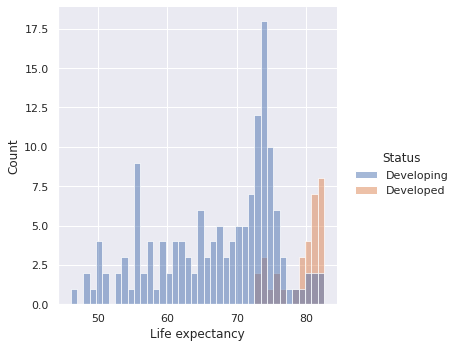

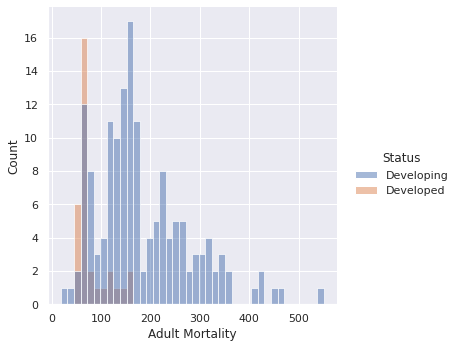

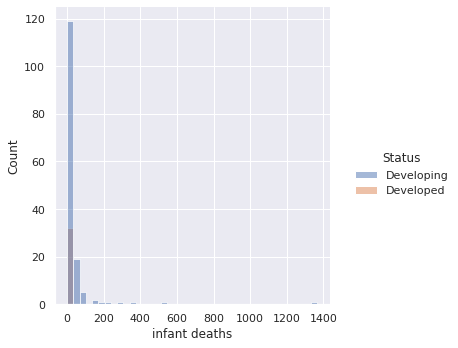

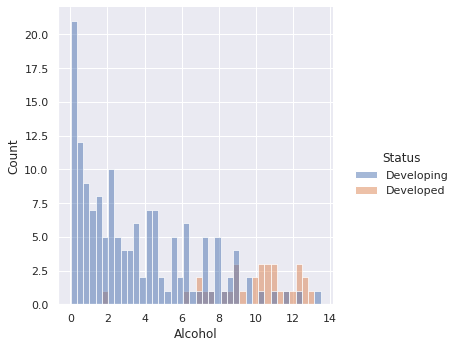

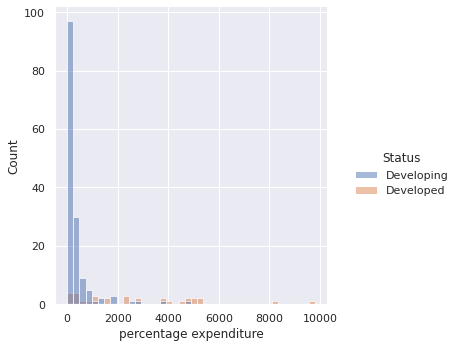

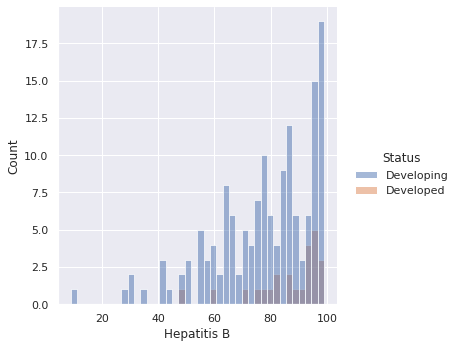

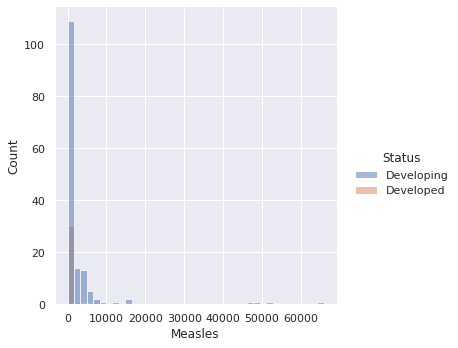

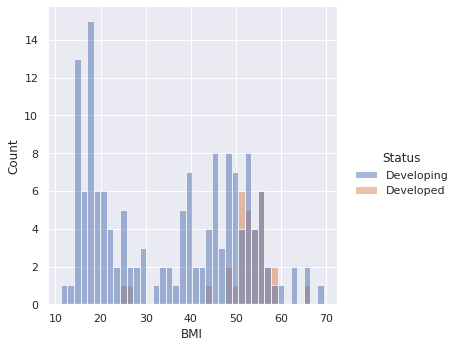

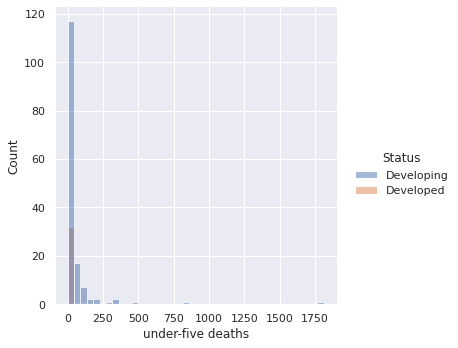

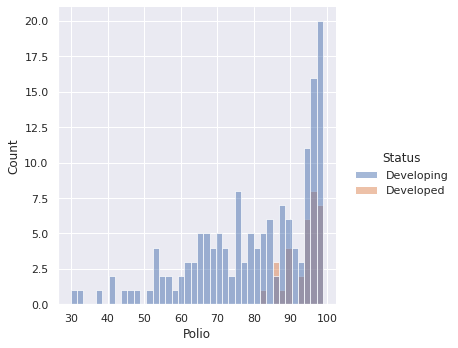

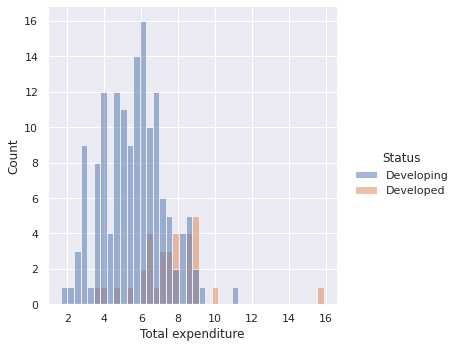

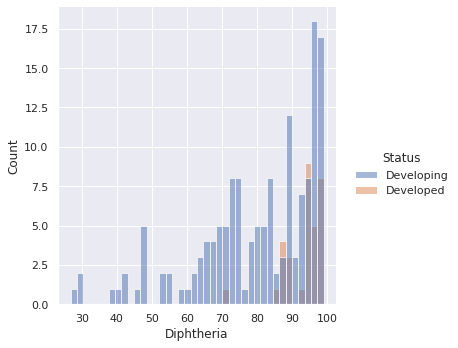

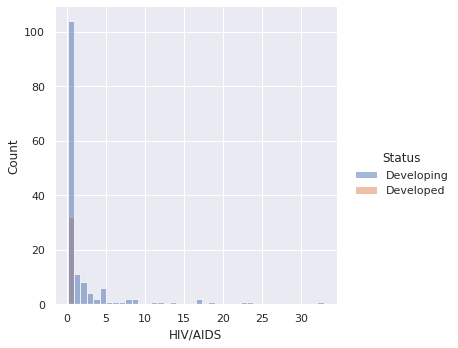

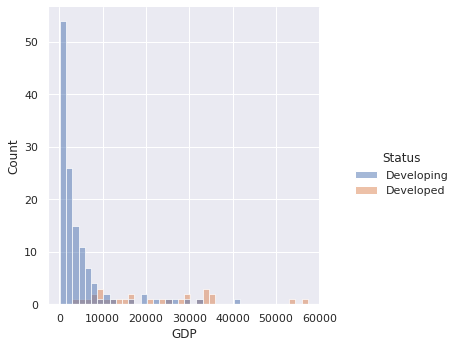

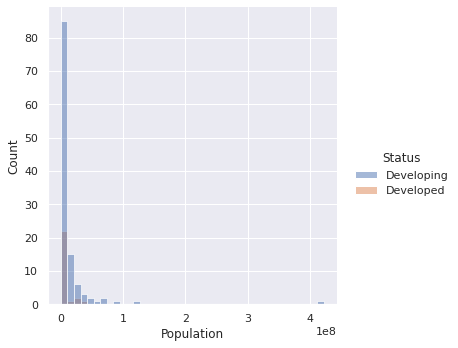

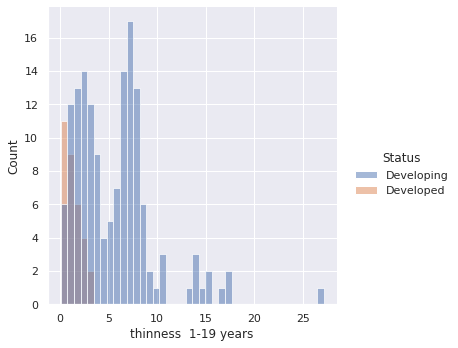

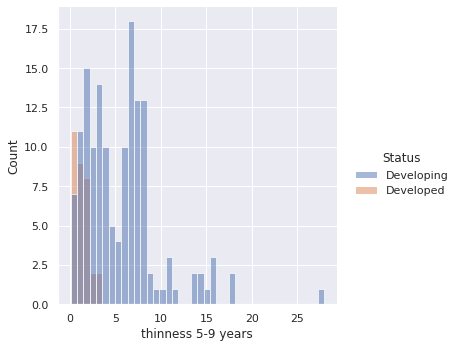

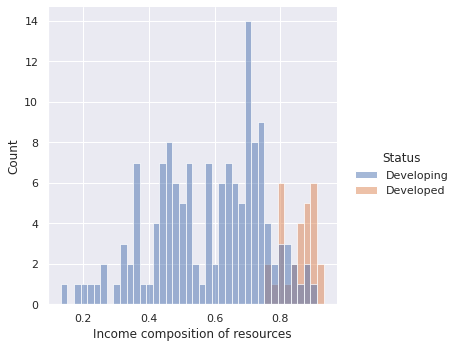

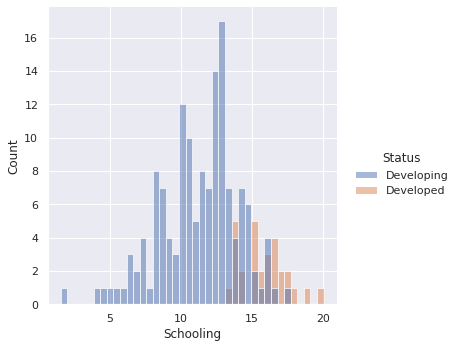

In [16]:
columnas_f = df.select_dtypes(include=["float64"]).columns

for c in columnas_f:
    sns.displot(df, x=c, bins=40, hue="Status")

En muchos de estos gráficos los países desarrollados aparecen en los extremos. Por lo tanto, va a haber una correlación entre los indicadores de esos gráficos y la expectativa de vida (porque los países desarrollados son justamente los que tienen expectativa más alta). En casi todos los casos hay una relación causal obvia entre los indicadores que parecen correlacionarse con la expectativa de vida. Por ejemplo, mortalidad infantil, mortalidad adulta, etc. Una excepción es el consumo de alcohol. Los países desarrollados son los que más consumen, así que la correlación con la expectativa de vida va a existir. Sabemos sin embargo que el consumo de alcohol no ayuda a prolongar la vida de las personas.

Otro aspecto interesante del histograma sobre el alcohol es que hay una cantidad muy grande de países con consumo cercano a 0. Voy a ver cuáles son estos.

In [17]:
df[df["Alcohol"] < 0.5]

,Unnamed: 0,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status
0,0,Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,...,8.252500,52.312500,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,Developing
2,2,Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,...,4.604000,91.875000,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,Developing
12,12,Bangladesh,69.30000,141.3750,153.6250,0.010000,32.320972,77.615385,4649.9375,12.87500,...,2.854667,92.750000,0.10000,443.561481,4.298516e+07,13.77500,14.33125,0.517875,8.69375,Developing
18,18,Bhutan,66.16250,230.2500,0.6875,0.278667,134.764070,94.125000,80.2500,17.58125,...,5.346000,93.875000,0.35625,1353.986946,4.925849e+05,17.21875,17.92500,0.183875,10.22500,Developing
23,23,Brunei Darussalam,76.48750,67.0625,0.0000,0.378667,1276.879485,97.875000,7.3125,29.71875,...,2.820000,96.812500,0.10000,19744.808102,NaN,6.20000,5.67500,0.839375,14.10625,Developing
32,32,Chad,50.38750,227.7500,44.8750,0.411333,32.277320,29.875000,4687.7500,16.31875,...,4.379333,26.812500,4.33750,484.791694,4.114092e+06,7.14375,7.04375,0.316625,6.08750,Developing
36,36,Comoros,61.58125,240.9375,1.6875,0.134667,47.731458,76.461538,62.6250,18.25625,...,4.832000,66.937500,0.28125,630.384334,5.322007e+05,7.27500,7.16250,0.324625,9.95625,Developing
50,52,Egypt,71.50000,170.6250,56.2500,0.188667,0.000000,96.687500,1069.2500,49.26250,...,5.346000,96.687500,0.10000,NaN,NaN,3.12500,3.07500,0.647625,11.89375,Developing
67,69,Guinea,56.01250,259.8750,30.8125,0.164667,15.891283,58.666667,1522.0000,17.46875,...,4.009333,47.875000,2.19375,279.464798,4.252799e+06,7.64375,7.62500,0.364750,7.17500,Developing
75,77,Indonesia,67.55625,166.5625,151.1875,0.068667,83.768316,73.562500,16244.9375,19.95625,...,2.663333,72.375000,0.20000,1669.116783,1.165553e+08,3.41875,3.94375,0.641437,11.61250,Developing


### Resultaron ser los países musulmanes, naturalmente (el Islam prohíbe el consume de alcohol). Muchos de estos países tienen expectativa de vida bastante baja, así que van a contribuir con la correlación entre consumo de alcohol y expectativa de vida. Voy a hacer un boxplot de la expectativa de vida para este subconjunto.

/home/andres/anaconda3/envs/tp3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Life expectancy'>

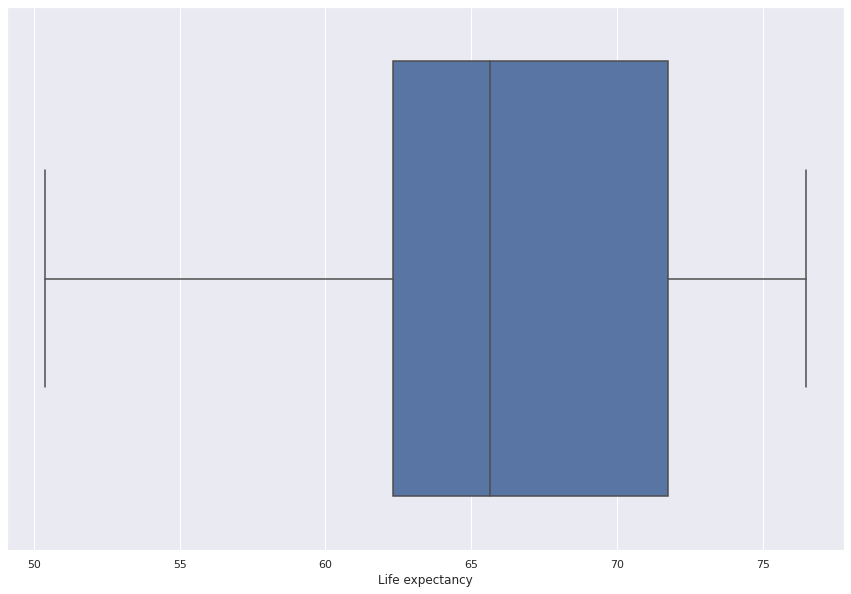

In [18]:
filtro = df[df["Alcohol"] < 0.5]
sns.boxplot(filtro["Life expectancy"])

### Están efectivamente muy por debajo de la media

## Calculo las correlaciones de todos los features con la expectativa de vida

In [19]:
df.corr()["Life expectancy"]

Unnamed: 0                        -0.017423
Life expectancy                    1.000000
Adult Mortality                   -0.896441
infant deaths                     -0.199914
Alcohol                            0.461720
percentage expenditure             0.524320
Hepatitis B                        0.429536
Measles                           -0.201076
BMI                                0.723824
under-five deaths                 -0.225785
Polio                              0.679231
Total expenditure                  0.290713
Diphtheria                         0.672322
HIV/AIDS                          -0.587153
GDP                                0.611808
Population                        -0.039915
thinness  1-19 years              -0.523989
thinness 5-9 years                -0.515970
Income composition of resources    0.817545
Schooling                          0.794457
Name: Life expectancy, dtype: float64

Adult mortality es naturalmente la que tiene más correlación (negativa). Después sigue Income Composition of Resources, que no está claro qué significa ni cómo se calcula, pero es algo que por definición correlaciona con el Índice de Desarrollo Humano, así que la correlación de este indicador con la expectativa de vida también es natural.

Llama la atención la poca correlación que existe entre expectativa de vida y mortalidad infantil (infant deaths y under-five deaths).

## Voy a tratar de encontrar grupos de features que se correlacionen fuertemente entre sí, para ver si conviene descartar alguno para más adelante (para evitar la multicolinearidad).

In [20]:
df.corr()

,Unnamed: 0,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Unnamed: 0,1.000000,-0.017423,0.051565,-0.030905,-0.067136,-0.044053,-0.012255,-0.034746,0.021571,-0.026858,0.017089,0.060192,-0.016574,0.103958,-0.029959,-0.025909,0.009538,0.025389,-0.028474,-0.026308
Life expectancy,-0.017423,1.000000,-0.896441,-0.199914,0.461720,0.524320,0.429536,-0.201076,0.723824,-0.225785,0.679231,0.290713,0.672322,-0.587153,0.611808,-0.039915,-0.523989,-0.515970,0.817545,0.794457
Adult Mortality,0.051565,-0.896441,1.000000,0.099440,-0.286503,-0.424081,-0.321612,0.098834,-0.621810,0.119620,-0.531039,-0.191233,-0.511538,0.696999,-0.505445,-0.009048,0.412011,0.414751,-0.651998,-0.606786
infant deaths,-0.030905,-0.199914,0.099440,1.000000,-0.122732,-0.117735,-0.300119,0.711078,-0.286579,0.996959,-0.241408,-0.166797,-0.240281,0.024589,-0.143179,0.906096,0.512102,0.514907,-0.160741,-0.201201
Alcohol,-0.067136,0.461720,-0.286503,-0.122732,1.000000,0.464958,0.152185,-0.088368,0.450205,-0.119939,0.361185,0.427916,0.343721,-0.086686,0.492621,-0.055793,-0.503288,-0.488593,0.556444,0.623472
percentage expenditure,-0.044053,0.524320,-0.424081,-0.117735,0.464958,1.000000,0.039219,-0.110970,0.364079,-0.120997,0.290563,0.237848,0.273418,-0.147532,0.942375,-0.062036,-0.365385,-0.367314,0.580725,0.557865
Hepatitis B,-0.012255,0.429536,-0.321612,-0.300119,0.152185,0.039219,1.000000,-0.268504,0.300396,-0.314790,0.790883,0.147830,0.792999,-0.184234,0.143379,-0.211573,-0.224350,-0.232575,0.337503,0.395088
Measles,-0.034746,-0.201076,0.098834,0.711078,-0.088368,-0.110970,-0.268504,1.000000,-0.309725,0.719636,-0.239703,-0.169716,-0.258502,0.034536,-0.138733,0.524161,0.315702,0.314946,-0.145369,-0.171927
BMI,0.021571,0.723824,-0.621810,-0.286579,0.450205,0.364079,0.300396,-0.309725,1.000000,-0.300138,0.506371,0.391820,0.492614,-0.340577,0.466903,-0.149859,-0.714633,-0.717365,0.681697,0.721263
under-five deaths,-0.026858,-0.225785,0.119620,0.996959,-0.119939,-0.120997,-0.314790,0.719636,-0.300138,1.000000,-0.267112,-0.168813,-0.267143,0.037544,-0.148540,0.891045,0.513889,0.515202,-0.180556,-0.217305


## Mejor con un heatmap

<AxesSubplot:>

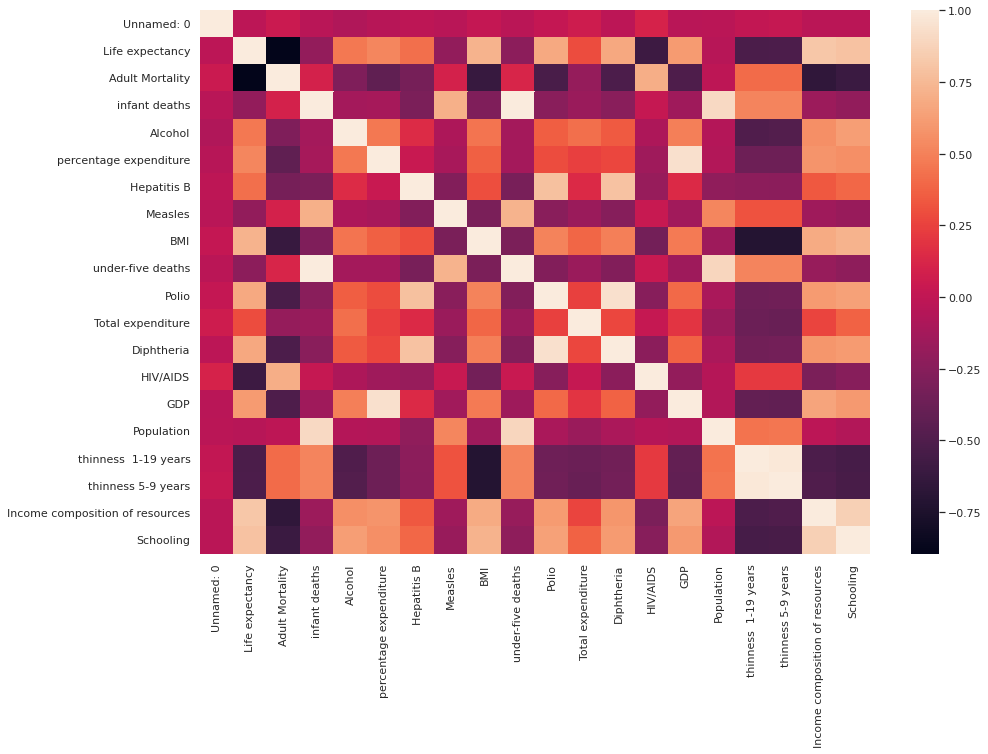

In [21]:
sns.heatmap(df.corr())

Los grupos de features con más correlación entre sí parecen ser:

* under-five deaths | infant deaths | Population
* thinnes 1-19 years | thinnes 5-9 years
* GDP | percentage expenditure

Voy a calcular las matrices de correlación para estos grupos por separado para verificar esto.

In [22]:
df[["under-five deaths", "infant deaths", "Population"]].corr()

,under-five deaths,infant deaths,Population
under-five deaths,1.000000,0.996959,0.891045
infant deaths,0.996959,1.000000,0.906096
Population,0.891045,0.906096,1.000000


In [23]:
df[["thinness  1-19 years", "thinness 5-9 years"]].corr()

,thinness 1-19 years,thinness 5-9 years
thinness 1-19 years,1.000000,0.985098
thinness 5-9 years,0.985098,1.000000


In [24]:
df[["GDP", "percentage expenditure"]].corr()

,GDP,percentage expenditure
GDP,1.000000,0.942375
percentage expenditure,0.942375,1.000000


## Analizo los datos que faltan

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       183 non-null    int64  
 1   Country                          183 non-null    object 
 2   Life expectancy                  183 non-null    float64
 3   Adult Mortality                  183 non-null    float64
 4   infant deaths                    183 non-null    float64
 5   Alcohol                          182 non-null    float64
 6   percentage expenditure           183 non-null    float64
 7   Hepatitis B                      174 non-null    float64
 8   Measles                          183 non-null    float64
 9   BMI                              181 non-null    float64
 10  under-five deaths                183 non-null    float64
 11  Polio                            183 non-null    float64
 12  Total expenditure     

### La primer columna incompleta que aparece es Alcohol. Ya vi antes que no es útil para predecir la expectativa de vida, así que podríamos ignorarla.

### El segundo feature para el que faltan datos es Hepatitis B, pero se ve en el heatmap que correlaciona bastante con Polio y Diphteria, así que también podríamos llegar a dejarlo de lado. Voy a verificar esto con la matriz de correlación.

In [26]:
df[["Hepatitis B", "Polio", "Diphtheria"]].corr()

,Hepatitis B,Polio,Diphtheria
Hepatitis B,1.000000,0.790883,0.792999
Polio,0.790883,1.000000,0.945657
Diphtheria,0.792999,0.945657,1.000000


### Faltan datos para BMI y no parece haber una correlación demasiado fuerte con otros features. Pero son sólo dos países los que faltan. Voy a fijarme cuáles son estos.

In [27]:
df["BMI"]

0      15.51875
1      49.06875
2      48.74375
3      18.01875
4      38.42500
         ...   
178    54.48750
179    11.18750
180    33.48750
181    17.45000
182    25.13750
Name: BMI, Length: 183, dtype: float64

In [28]:
import numpy as np

np.where(pd.isnull(df["BMI"]))

(array([150, 153]),)

### Son los países con índices 150 y 153. Me fijo cuáles son estos.

In [29]:
df.iloc[150]

Unnamed: 0                                 159
Country                            South Sudan
Life expectancy                         53.875
Adult Mortality                        346.312
infant deaths                            27.75
Alcohol                                    NaN
percentage expenditure                 8.24108
Hepatitis B                                 31
Measles                                 315.75
BMI                                        NaN
under-five deaths                        43.25
Polio                                       44
Total expenditure                         2.71
Diphtheria                                  47
HIV/AIDS                               3.69375
GDP                                    1092.23
Population                         3.75083e+06
thinness  1-19 years                       NaN
thinness 5-9 years                         NaN
Income composition of resources       0.131688
Schooling                              1.53125
Status       

In [30]:
df.iloc[153]

Unnamed: 0                                 162
Country                                  Sudan
Life expectancy                         61.825
Adult Mortality                        240.312
infant deaths                           64.625
Alcohol                                  1.458
percentage expenditure                 97.6984
Hepatitis B                            72.3636
Measles                                   3108
BMI                                        NaN
under-five deaths                       96.625
Polio                                    72.25
Total expenditure                      5.69533
Diphtheria                              72.375
HIV/AIDS                                  0.25
GDP                                     1192.8
Population                         1.80465e+07
thinness  1-19 years                       NaN
thinness 5-9 years                         NaN
Income composition of resources          0.441
Schooling                                6.375
Status       

### Sudán y Sudán del Sur. Estos dos países además no dan datos para "thinness 1-19 years" y "thinness 5-9 years". Voy a querer usar alguno de estos features, así que tal vez lo mejor sea descartar a estos dos países.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       183 non-null    int64  
 1   Country                          183 non-null    object 
 2   Life expectancy                  183 non-null    float64
 3   Adult Mortality                  183 non-null    float64
 4   infant deaths                    183 non-null    float64
 5   Alcohol                          182 non-null    float64
 6   percentage expenditure           183 non-null    float64
 7   Hepatitis B                      174 non-null    float64
 8   Measles                          183 non-null    float64
 9   BMI                              181 non-null    float64
 10  under-five deaths                183 non-null    float64
 11  Polio                            183 non-null    float64
 12  Total expenditure     

### Faltan dos países en "Total expenditure" y según el heatmap no correlaciona demasiado con ninguna otra columna. Voy a fijarme cuáles son los países sin datos.

In [32]:
np.where(pd.isnull(df["Total expenditure"]))

(array([ 44, 148]),)

In [33]:
df.iloc[44]

Unnamed: 0                                                            45
Country                            Democratic People's Republic of Korea
Life expectancy                                                  69.1938
Adult Mortality                                                  160.812
infant deaths                                                     9.9375
Alcohol                                                                3
percentage expenditure                                                 0
Hepatitis B                                                      88.8462
Measles                                                          222.562
BMI                                                               25.625
under-five deaths                                                12.8125
Polio                                                              98.25
Total expenditure                                                    NaN
Diphtheria                                         

In [34]:
df.iloc[148]

Unnamed: 0                                157
Country                               Somalia
Life expectancy                       53.3188
Adult Mortality                        316.75
infant deaths                          49.875
Alcohol                                  0.01
percentage expenditure                      0
Hepatitis B                                42
Measles                               5494.06
BMI                                   18.6875
under-five deaths                     80.5625
Polio                                 29.8125
Total expenditure                         NaN
Diphtheria                            29.3125
HIV/AIDS                               0.8375
GDP                                   297.473
Population                                NaN
thinness  1-19 years                  7.26875
thinness 5-9 years                    7.08125
Income composition of resources           NaN
Schooling                                 NaN
Status                            

### Corea del Norte y Somalia. Para estos países faltan otros datos importantes, así que tal vez convenga descartarlos.

### La siguiente columna para la que faltan datos es GDP, pero ya vi que correlaciona con Percentage Expenditure, que está completa, así que no es un problema (descartamos GDP y listo).

### Después viene Population, que correlaciona con Infant Deaths y Under-Five Deaths (completas), así que descartamos Population.

### Después vienen las dos columnas de Thinness, pero ya vi que los dos países que no dan datos son Sudán y Sudán del Sur, que ya los había descartado antes. Así que estas columnas quedan completas.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       183 non-null    int64  
 1   Country                          183 non-null    object 
 2   Life expectancy                  183 non-null    float64
 3   Adult Mortality                  183 non-null    float64
 4   infant deaths                    183 non-null    float64
 5   Alcohol                          182 non-null    float64
 6   percentage expenditure           183 non-null    float64
 7   Hepatitis B                      174 non-null    float64
 8   Measles                          183 non-null    float64
 9   BMI                              181 non-null    float64
 10  under-five deaths                183 non-null    float64
 11  Polio                            183 non-null    float64
 12  Total expenditure     

### Los últimos que aparecen con datos faltantes son Income Composition of Resources y Schooling. Estos features son importantes y me faltan varios países (10 en total y 8 luego de descartar a Corea del Norte y Somalia), así que va a haber que pensar alguna forma de completar esos datos. Voy a fijarme cuáles son los países para los que falta esta información.

In [36]:
np.where(pd.isnull(df["Income composition of resources"]))

(array([ 42,  43,  44,  45, 130, 131, 148, 172, 173, 174]),)

In [37]:
np.where(pd.isnull(df["Schooling"]))

(array([ 42,  43,  44,  45, 130, 131, 148, 172, 173, 174]),)

### Son los mismos. No sé si es una buena idea sacarlos a todos porque son bastantes. Una posibilidad es tomar el feature que mejor correlaciona con estos y para estos países estimar los datos que faltan a partir de ese feature. El que parece que correlaciona mejor es BMI.

In [38]:
df[["BMI", "Income composition of resources", "Schooling"]].corr()

,BMI,Income composition of resources,Schooling
BMI,1.000000,0.681697,0.721263
Income composition of resources,0.681697,1.000000,0.864055
Schooling,0.721263,0.864055,1.000000
